## The third In-class-exercise (2/22/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
An interesting text classification question I taught was about sentiment analysis. I want to scrape the tweets from the Twitter account of BillGates to identify what kind of person he 
actually is. Is he a positive person, a negative person or is he kinda both?

Now, once I have extracted the tweets from his Twitter timeline, I had my thoughts on what kind of features might be important to make this analysis a success. 

Feature Extraction:
The features I felt that would be important are :

1. Number of words: Because there could be a possibility that he might use a lot of words to describe when he is happy about something and few words when is not.
2. Number of Upper Case Words: Because it could be possible that he represented a few words in complete upper case to describe something, which he feels might be important.
3. Number of Special Characters: There could be a possibility that he has expressed few words in special characters which deal with emotion or feeling towards something.
4. Number of Numerics: There could be a possibility that he numbers to describe the intent of something.
5. Number of Adjectives: Since adjectives are describing words, calculating the number of adjectives might give us an insight into the sentiment of the tweet.
6. Number of Nouns : To get a insight on the class of topic he is talking about.
7. Number of Adverbs: An adverb describes an emotion, so this feature is definetly important for sentiment analysis
8. Number of Verbs: Verbs are action words, which could describe the actions billgates is talking about.

Therefore, all the above features are very important for building a good machine learning model and sentiment analysis.

Data Preprocessing:
Once I have extracted all this features, I have started cleaning the text for better analysis. The steps that I took to clean the tweets are:
1. Removed mentions (@)
2. Removed Hashtags (#)
3. Removed Retweets (RT)
4. Removed URL's
5. Filtered out non-alphanumeric characters
6. Filtered out nextline characters (\n)
7. Removed Numbers
8. Converted all the tweets into lowercase
9. Removed the stopwords
10. Performed Stemming
11. Performed Lemmatization
'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [1]:
#Importing the required libraries
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Web Scraping to get the tweets
%run ./keys.ipynb

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

number_of_tweets = 1000
tweets = []

for i in tweepy.Cursor(api.user_timeline, id = "BillGates", lang = "en", tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    

data = {"Text": tweets}

data = pd.DataFrame(data = data)

In [2]:
data.head()

,Text
0,I’m optimistic about our ability to prevent th...
1,The Global Fund is one of the best investments...
2,"At the end of the day, Paul’s most lasting imp..."
3,His work will continue through Partners in Hea...
4,Paul was never happier than when he was caring...


In [3]:
#Feature extractions

#1. Extracting hashtags
#import neattext.functions as nfx
#def hashtags (text):
#    nfx.extract_hashtags(text)
#    return 
#data["Hashtags"] = data["Text"].apply(hashtags)

#2. Number of words
data["Number of words"] = data["Text"].apply(lambda x: len(str(x).split(" ")))

#3. Number of Uppercase Words
data["Number of Uppercase words"] = data["Text"].apply(lambda x: len([x for x in x.split() if x.isupper()]))

#4. Number of Special Characters
data["Number of Special Characters"] = data["Text"].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

#5. Number of Numerics
data["Number of Numerics"] = data["Text"]. apply(lambda x : len([x for x in x.split() if x.isdigit()]))


import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#6. Number of Adjectives
def count_adj(text, model=nlp):
    doc = model(text)
    # Generate POS tags
    pos = [token.pos_ for token in doc]
    # Total number of adjectives as in previous assignments.
    return pos.count('ADJ')
data["Total Adjectives"] = data["Text"].apply(count_adj)

#7. Number of Nouns
def count_nouns(text, model=nlp):
    doc = model(text)
    # Generate POS tags
    pos = [token.pos_ for token in doc]
    # Total number of nouns as in previous assignments.
    return pos.count('NOUN')
data["Total Nouns"] = data["Text"].apply(count_nouns)

#8. Number of Adverbs
def count_adv(text, model=nlp):
    doc = model(text)
    # Generate POS tags
    pos = [token.pos_ for token in doc]
    # Total number of adverbs as in previous assignments.
    return pos.count('ADV')
data["Total Adverbs"] = data["Text"].apply(count_adv)

#9. Number of Verbs
def count_verb(text, model=nlp):
    doc = model(text)
    # Generate POS tags
    pos = [token.pos_ for token in doc]
    # Total number of nouns as in previous assignments.
    return pos.count('VERB')
data["Total Verbs"] = data["Text"].apply(count_verb)
                       


In [4]:
#Data cleaning

import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

data["Text"] = data["Text"].apply(cleantext)

#Converting the text into lower case
data['Text']=data["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
data['Text']=data['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text']=data['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatization
from textblob import Word
nltk.download('wordnet')
data['Text']=data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
data.head()

,Text,Number of words,Number of Uppercase words,Number of Special Characters,Number of Numerics,Total Adjectives,Total Nouns,Total Adverbs,Total Verbs
0,optimist abil prevent next pandem learn much c...,24,1,0,0,3,3,2,3
1,global fund one best invest global health full...,38,3,0,1,5,8,1,3
2,end day paul last impact found patient love de...,36,0,0,0,2,7,3,4
3,work continu partner health incred organ co fo...,18,0,0,0,2,3,0,4
4,paul never happier care patient one clinic hel...,38,0,0,0,1,8,1,5


In [6]:
cleaned_data = data.copy()

cleaned_data.drop (columns = ["Number of words", "Number of Uppercase words", "Number of Special Characters", "Number of Numerics", "Total Adjectives", "Total Nouns", 
                              "Total Adverbs", "Total Verbs"], inplace = True)

#Sentiment Analysis

#It is required to calculate the subjectivity and polarity of the tweets for sentiment analysis.

#Subjectivity
from textblob import TextBlob
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity
cleaned_data["Subjectivity"] = cleaned_data["Text"].apply(getSubjectivity)

#Polarity
def getpolarity (text):
    return TextBlob(text).sentiment.polarity
cleaned_data["Polarity"] = cleaned_data["Text"].apply(getpolarity)

#5. Creating function to identify if the tweet is positive, negative or neutal
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
cleaned_data["Analysis"] = cleaned_data["Polarity"].apply(getAnalysis)

cleaned_data.head()

,Text,Subjectivity,Polarity,Analysis
0,optimist abil prevent next pandem learn much c...,0.100000,0.100000,Positive
1,global fund one best invest global health full...,0.073333,0.200000,Positive
2,end day paul last impact found patient love de...,0.333333,0.250000,Positive
3,work continu partner health incred organ co fo...,0.000000,0.000000,Neutral
4,paul never happier care patient one clinic hel...,0.500000,0.136364,Positive


<AxesSubplot:>

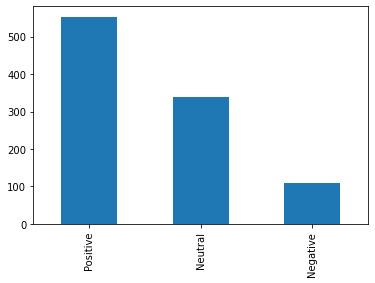

In [7]:
#Identying the number of positive, negative and neutral tweets to get a better understanding of BillGates

cleaned_data["Analysis"].value_counts().plot(kind = 'bar')
#There are more number of positive tweets so we can conculude stating that BillGates is a positive person.

Text(0, 0.5, 'Subjectivity')

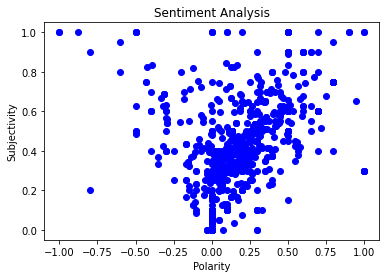

In [8]:
#Polarity vs Subjectivity
import matplotlib.pyplot as plt
for i in range (0, cleaned_data.shape[0]):
    plt.scatter(cleaned_data['Polarity'][i], cleaned_data["Subjectivity"][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

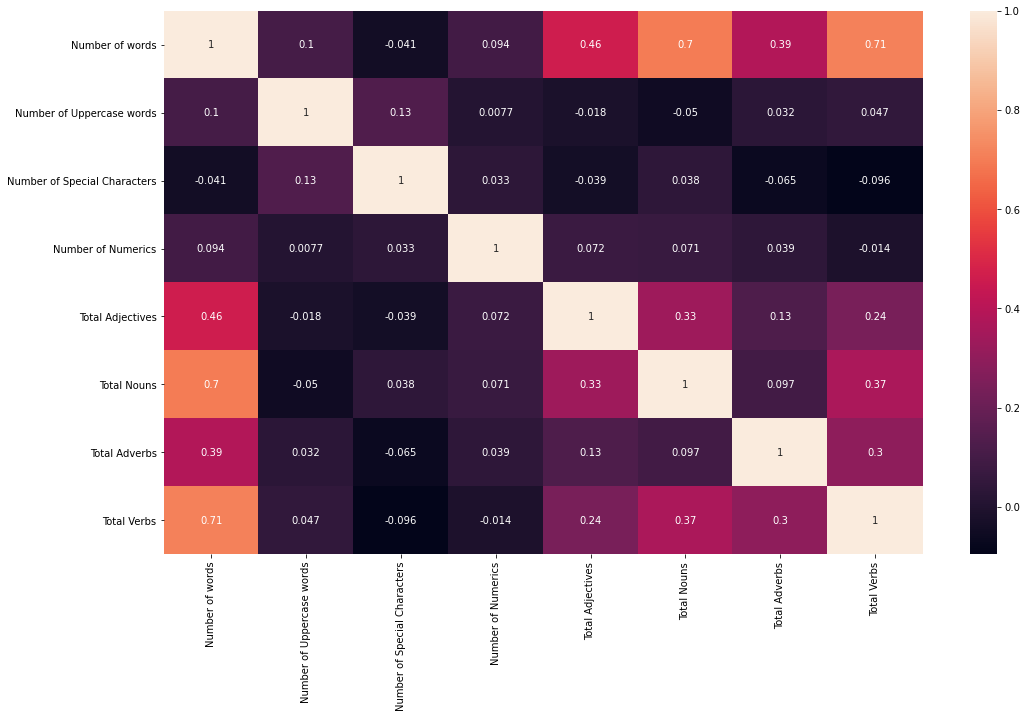

In [10]:
#Correlation analysis to check the similarity between the attributes

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (17,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [11]:
#No two attributes are highly correlated with each other so I am keeping all the attributes in my analysis

In [12]:
data.head()

,Text,Number of words,Number of Uppercase words,Number of Special Characters,Number of Numerics,Total Adjectives,Total Nouns,Total Adverbs,Total Verbs
0,optimist abil prevent next pandem learn much c...,24,1,0,0,3,3,2,3
1,global fund one best invest global health full...,38,3,0,1,5,8,1,3
2,end day paul last impact found patient love de...,36,0,0,0,2,7,3,4
3,work continu partner health incred organ co fo...,18,0,0,0,2,3,0,4
4,paul never happier care patient one clinic hel...,38,0,0,0,1,8,1,5


In [13]:
#Random forest classifier

x = data.iloc[:, 1:]
y = data.iloc[:, 0:1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 202)

In [14]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
attributes = ["Number of words", "Number of Uppercase words", "Number of Special Characters", "Number of Numerics", "Total Adjectives", "Total Nouns", "Total Adverbs", "Total Verbs"]

feature_importance = pd.concat([pd.Series(attributes), pd.Series(randomForest.feature_importances_)],axis=1)
feature_importance.columns = ['Attributes', 'feature_importance']
feature_importance.sort_values(by='feature_importance', ascending=False)

,Attributes,feature_importance
0,Number of words,0.253370
5,Total Nouns,0.191565
7,Total Verbs,0.155384
4,Total Adjectives,0.140542
6,Total Adverbs,0.107481
1,Number of Uppercase words,0.090179
2,Number of Special Characters,0.039000
3,Number of Numerics,0.022479
